# PRAVEER RAJ 
## BATCH - MATHS AND COMPUTING
## WEEK 1
### ROLL NO. 1

Date: 6th January 2025 

EXERCISE 1:  Consider the “Titanic.csv” data set and note the following meta 
information:  
PassengerId - Identifier for passenger  
Survived - If passenger survived the ship, 1 if passenger survived, 0 otherwise  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)   
Name   
Sex   
Age   
SibSp - Number of Siblings/Spouses Aboard   
Parch - Number of Parents/Children Aboard   
Ticket - Ticket number  
Fare - Passenger Fare (in British pounds)   
Cabin - Cabin number  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)   
Use Python and appropriate packages to answer the following questions:  
1. Replace the index value of DataFrame with PassengerId     
2. Identify the missing values of the columns Age, Embarked and Cabin columns  
3. Get descriptive statistics on "object" and “number” datatypes separately.   
4. Find how much % of the passengers were survived.      
5. Find the % of male survival and female survival rate and check whether the gender 
has any relationship with the survival rates.        
6. Find the age of passengers per passenger class, visualize using appropriate plot.    
7. List out the passengers who had more than 2 family members on board.     
8. Find and list all attributes that are related to survival using appropriate tests.  
9. Determine the total number of male and female passengers in each class, categorized 
by whether they survived or did not survive. 

Missing values:
 Age         177
Embarked      2
Cabin       687
dtype: int64

Numerical Stats:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Categorical Stats:
                            Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      1

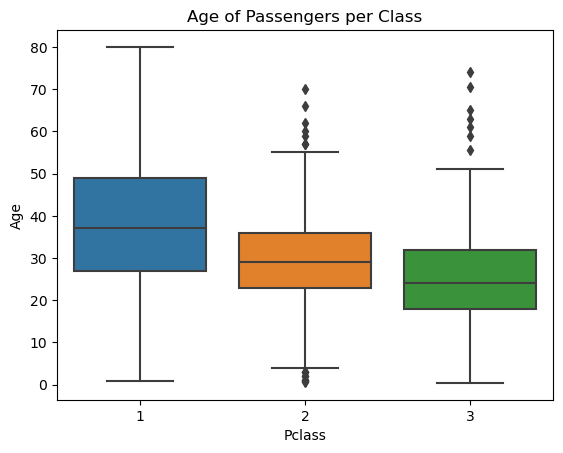


Passengers with more than 2 family members:
                                                           Name  FamilySize
PassengerId                                                               
8                               Palsson, Master. Gosta Leonard           4
14                                 Andersson, Mr. Anders Johan           6
17                                        Rice, Master. Eugene           5
25                               Palsson, Miss. Torborg Danira           4
26           Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...           6
...                                                        ...         ...
851                    Andersson, Master. Sigvard Harald Elias           6
859                      Baclini, Mrs. Solomon (Latifa Qurban)           3
864                          Sage, Miss. Dorothy Edith "Dolly"          10
886                       Rice, Mrs. William (Margaret Norton)           5
889                   Johnston, Miss. Catherine Helen 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# Load the Titanic dataset
df = pd.read_csv("Titanic.csv")

# 1. Replace the index value of DataFrame with PassengerId
df.set_index('PassengerId', inplace=True)

# 2. Identify the missing values of the columns Age, Embarked, and Cabin columns
missing_values = df[['Age', 'Embarked', 'Cabin']].isnull().sum()
print("Missing values:\n", missing_values)

# 3. Get descriptive statistics on "object" and "number" datatypes separately
# Descriptive statistics for numerical columns
numerical_stats = df.describe()

# Descriptive statistics for categorical columns (object dtype)
categorical_stats = df.describe(include=['object'])

print("\nNumerical Stats:\n", numerical_stats)
print("\nCategorical Stats:\n", categorical_stats)

# 4. Find how much % of the passengers survived
survival_rate = df['Survived'].mean() * 100
print(f"\nSurvival rate: {survival_rate:.2f}%")

# 5. Find the % of male survival and female survival rate and check whether gender has any relationship with the survival rates
gender_survival_rate = df.groupby('Sex')['Survived'].mean() * 100
print("\nGender-based Survival Rate:\n", gender_survival_rate)

# Perform a Chi-Square test to check the relationship between gender and survival
gender_survival_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = chi2_contingency(gender_survival_table)
print(f"\nChi-Square p-value for Gender and Survival: {p:.4f}")

# 6. Find the age of passengers per passenger class, visualize using appropriate plot
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age of Passengers per Class')
plt.show()

# 7. List out the passengers who had more than 2 family members on board
df['FamilySize'] = df['SibSp'] + df['Parch']
family_members_over_2 = df[df['FamilySize'] > 2]
print("\nPassengers with more than 2 family members:\n", family_members_over_2[['Name', 'FamilySize']])

# 8. Find and list all attributes that are related to survival using appropriate tests
# Categorical attributes (e.g., Sex, Pclass, Embarked)
categorical_columns = ['Sex', 'Pclass', 'Embarked']
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Survived'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-Square p-value for {col} and Survival: {p:.4f}")

# Numerical attributes (e.g., Age, Fare)
numerical_columns = ['Age', 'Fare']
for col in numerical_columns:
    survived_group = df[df['Survived'] == 1][col]
    not_survived_group = df[df['Survived'] == 0][col]
    t_stat, p_value = ttest_ind(survived_group.dropna(), not_survived_group.dropna())
    print(f"T-test p-value for {col} and Survival: {p_value:.4f}")

# 9. Determine the total number of male and female passengers in each class, categorized by whether they survived or did not survive
gender_class_survival = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'])
print("\nGender and Class Survival:\n", gender_class_survival)


EXERCISE 2: Descriptive Analytics and Visualization  
The data file bollywood.csv contains box office collection and social media promotion 
information about movies released in 2013−2015 period. Following are the columns and their 
descriptions: 
• SlNo   
• Release Date  
• MovieName – Name of the movie  
• ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive 
Season), HS (Holiday Season), N (Normal)  
• Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc   
• Budget – Movie creation budget  
• BoxOfficeCollection – Box office collection  
• YoutubeViews – Number of views of the YouTube trailers  
• YoutubeLikes – Number of likes of the YouTube trailers  
• YoutubeDislikes – Number of dislikes of the YouTube trailers  
Use Python code to answer the following questions:  
1. How many records are present in the dataset?   
2. How many movies got released in each genre? Sort number of releases in each genre 
in descending order.  
3. Which genre had highest number of releases?  
4. How many movies in each genre got released in different release times like long 
weekends, festive season, etc. (Note: Do a cross tabulation between Genre and 
ReleaseTime.)  
5. Which month of the year, maximum number movie releases are seen? (Note: Extract a 
new column called month from ReleaseDate column.)  
6. Which month of the year typically sees most releases of high budgeted movies, that is, 
movies with budget of 25 crore or more?  
7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate 
return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.  
8. Do the movies have higher ROI if they get released on festive seasons or long 
weekend? Calculate the average ROI for different release times.  
9. Is there a correlation between box office collection and YouTube likes? Is the 
correlation positive or negative?  
10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each 
genre of movies to compare.  
11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, 
YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or 
heatmap.  
12. During 2013−2015 period, highlight the genre of movies and their box office 
collection? Visualize with best fit graph.  
13. Visualize  the Budget and Box office collection based on Genre.  
14. Find the distribution of movie budget for every Genre.  
15. During 2013−2015, find the number of movies released in every year. Also, visualize 
with best fit graph.


Number of records in the dataset: 149

Movies released in each genre:
 Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

The genre with the highest number of releases: Comedy

Movies released in different times by genre:
 ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2
Column 'ReleaseDate' not found!
Column 'Month' not found!

Top 10 movies with maximum ROI:
                      MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharm

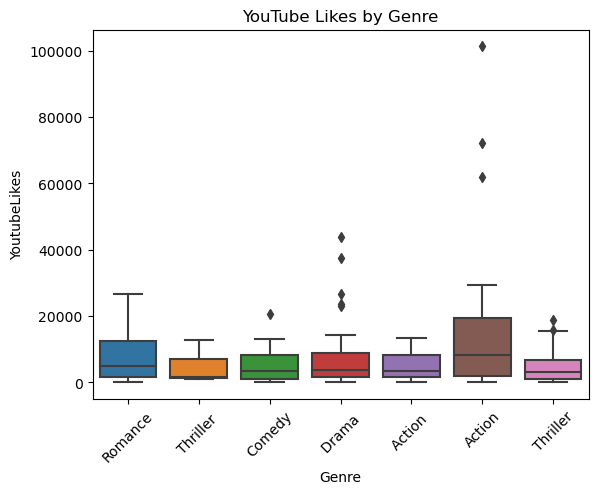

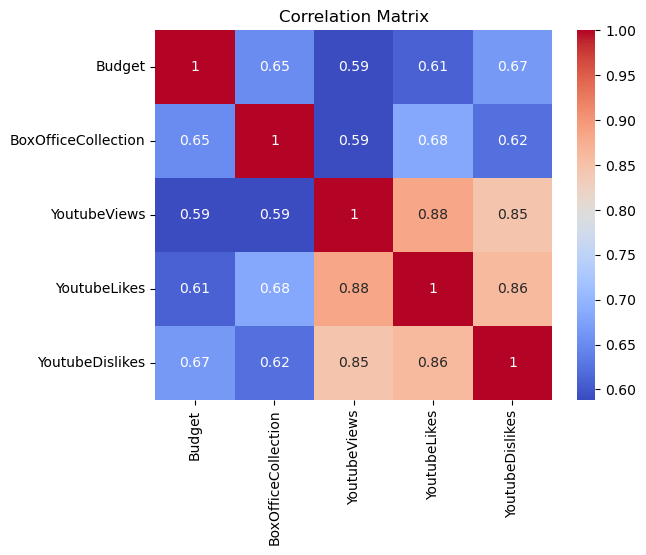

ValueError: could not convert string to float: 'Romance'

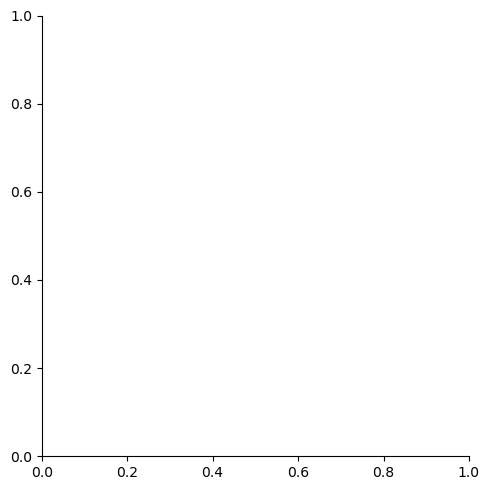

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Bollywood dataset
df = pd.read_csv("bollywood.csv")

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# 1. How many records are present in the dataset?
num_records = len(df)
print(f"Number of records in the dataset: {num_records}")

# 2. How many movies got released in each genre? Sort by count in descending order.
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)
print("\nMovies released in each genre:\n", genre_counts)

# 3. Which genre had the highest number of releases?
max_genre = genre_counts.idxmax()
print(f"\nThe genre with the highest number of releases: {max_genre}")

# 4. How many movies in each genre got released during different release times?
genre_release_time = pd.crosstab(df['Genre'], df['ReleaseTime'])
print("\nMovies released in different times by genre:\n", genre_release_time)

# 5. Which month of the year saw the maximum number of movie releases?
# First, check if the 'ReleaseDate' column exists and convert to datetime format
if 'ReleaseDate' in df.columns:
    df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])  # Convert to datetime format
    df['Month'] = df['ReleaseDate'].dt.month
    month_counts = df['Month'].value_counts().sort_index()
    print(f"\nMovies released per month:\n {month_counts}")
else:
    print("Column 'ReleaseDate' not found!")

# 6. Which month saw most releases of high-budgeted movies (Budget >= 25 crore)?
high_budget_movies = df[df['Budget'] >= 25]
if 'Month' in high_budget_movies.columns:
    high_budget_month_counts = high_budget_movies['Month'].value_counts().sort_index()
    print(f"\nMonth with most high-budgeted releases:\n {high_budget_month_counts}")
else:
    print("Column 'Month' not found!")

# 7. Top 10 movies with maximum return on investment (ROI)
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_10_roi = df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)
print(f"\nTop 10 movies with maximum ROI:\n", top_10_roi)

# 8. Do movies released during festive season or long weekend have higher ROI?
avg_roi_release_time = df.groupby('ReleaseTime')['ROI'].mean()
print(f"\nAverage ROI for different release times:\n", avg_roi_release_time)

# 9. Correlation between BoxOfficeCollection and YoutubeLikes
correlation = df[['BoxOfficeCollection', 'YoutubeLikes']].corr()
print(f"\nCorrelation between BoxOfficeCollection and YoutubeLikes:\n", correlation)

# 10. Which genre of movies typically sees more YouTube likes? Boxplot for each genre.
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.title('YouTube Likes by Genre')
plt.xticks(rotation=45)
plt.show()

# 11. Correlation among Budget, BoxOfficeCollection, YoutubeViews, YoutubeLikes, YoutubeDislikes
correlation_matrix = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# 12. Genre vs BoxOfficeCollection (Visualize with best fit graph)
sns.lmplot(x='Genre', y='BoxOfficeCollection', data=df)
plt.title('Genre vs BoxOfficeCollection')
plt.xticks(rotation=45)
plt.show()

# 13. Visualize Budget and BoxOfficeCollection based on Genre
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=df)
plt.title('Budget vs BoxOfficeCollection by Genre')
plt.show()

# 14. Distribution of movie budget for every Genre (Boxplot)
sns.boxplot(x='Genre', y='Budget', data=df)
plt.title('Movie Budget Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

# 15. Find the number of movies released in each year (2013-2015)
if 'ReleaseDate' in df.columns:
    df['Year'] = df['ReleaseDate'].dt.year
    year_counts = df['Year'].value_counts().sort_index()
    print(f"\nMovies released per year:\n", year_counts)

    # Visualize number of releases per year
    sns.lineplot(x=year_counts.index, y=year_counts.values)
    plt.title('Number of Movies Released per Year (2013-2015)')
    plt.xlabel('Year')
    plt.ylabel('Number of Releases')
    plt.show()
else:
    print("Column 'ReleaseDate' not found!")
